Import Required Library 

In [3]:
import pandas as pd
import numpy
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

import math
from sklearn.metrics import mean_squared_error
from numpy import array
import matplotlib.pyplot as plt

Import Dataset

In [4]:
data=pd.read_csv(r"C:\Users\kirut\Downloads\historical_data.csv",na_values="None")

In [5]:
data

,Date,Open,High,Low,Close,Volume,Daily Change %
0,08-Jul-2022,1031.00,1034.7,1014.55,1026.50,2841036,-0.44
1,07-Jul-2022,1020.95,1026.9,1016.00,1020.75,1901699,-0.02
2,06-Jul-2022,1008.00,1014.9,1001.60,1009.90,2188175,0.19
3,05-Jul-2022,1005.00,1021.9,999.00,1003.20,3045188,-0.18
4,04-Jul-2022,1010.70,1013.8,995.00,999.95,1814322,-1.06
...,...,...,...,...,...,...,...
1632,14-Dec-2015,536.00,546.5,535.15,544.65,788606,1.61
1633,14-Dec-2015,539.95,544.6,534.00,536.35,938866,-0.67
1634,14-Dec-2015,539.60,544.5,536.00,542.60,852540,0.56
1635,14-Dec-2015,543.00,545.6,537.15,540.00,715680,-0.55


Reverse the dataset and extract the required columns

In [6]:
data2=data[::-1]
data2=data2.reset_index()
data2=data2.iloc[0:,1:]
data2

,Date,Open,High,Low,Close,Volume,Daily Change %
0,14-Dec-2015,533.00,543.1,533.00,542.15,1079295,1.72
1,14-Dec-2015,543.00,545.6,537.15,540.00,715680,-0.55
2,14-Dec-2015,539.60,544.5,536.00,542.60,852540,0.56
3,14-Dec-2015,539.95,544.6,534.00,536.35,938866,-0.67
4,14-Dec-2015,536.00,546.5,535.15,544.65,788606,1.61
...,...,...,...,...,...,...,...
1632,04-Jul-2022,1010.70,1013.8,995.00,999.95,1814322,-1.06
1633,05-Jul-2022,1005.00,1021.9,999.00,1003.20,3045188,-0.18
1634,06-Jul-2022,1008.00,1014.9,1001.60,1009.90,2188175,0.19
1635,07-Jul-2022,1020.95,1026.9,1016.00,1020.75,1901699,-0.02


Select the Close column

In [7]:
data1=data2['Close']
data1

0        542.15
1        540.00
2        542.60
3        536.35
4        544.65
         ...   
1632     999.95
1633    1003.20
1634    1009.90
1635    1020.75
1636    1026.50
Name: Close, Length: 1637, dtype: float64

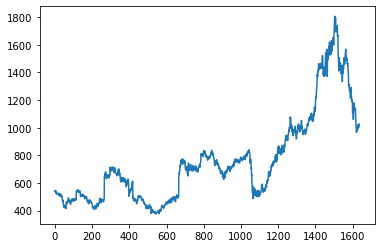

In [8]:
plt.plot(data1)

Scale the dataset range within 0 to 1

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [10]:
data1

array([[0.11599524],
       [0.11449154],
       [0.11630997],
       ...,
       [0.4431389 ],
       [0.45072737],
       [0.45474892]])

In [11]:
data1.ndim

2

Split the data into train and test 

In [17]:
train_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:train_size,:],data1[train_size:len(data1),:1]

In [18]:
train_size,test_size

(1064, 573)

In [19]:
train_data

array([[0.11599524],
       [0.11449154],
       [0.11630997],
       ...,
       [0.14222269],
       [0.10749755],
       [0.13991467]])

Convert an array of values into a dataset matrix

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(963, 100)
(963,)


(None, None)

In [23]:
print(X_test.shape),print(ytest.shape)

(472, 100)
(472,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Create the Stacked LSTM model

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 9s 215ms/step - loss: 0.0080 - val_loss: 0.0409
Epoch 2/100
16/16 [==============================] - 2s 136ms/step - loss: 0.0017 - val_loss: 0.0068
Epoch 3/100
16/16 [==============================] - 2s 142ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 4/100
16/16 [==============================] - 2s 138ms/step - loss: 8.4336e-04 - val_loss: 0.0037
Epoch 5/100
16/16 [==============================] - 2s 144ms/step - loss: 8.1480e-04 - val_loss: 0.0047
Epoch 6/100
16/16 [==============================] - 2s 140ms/step - loss: 7.5199e-04 - val_loss: 0.0051
Epoch 7/100
16/16 [==============================] - 2s 141ms/step - loss: 7.0377e-04 - val_loss: 0.0050
Epoch 8/100
16/16 [==============================] - 2s 137ms/step - loss: 6.5781e-04 - val_loss: 0.0030
Epoch 9/100
16/16 [==============================] - 2s 133ms/step - loss: 6.1640e-04 - val_loss: 0.0054
Epoch 10/100
16/16 [==============================] - 2s 133ms/step

16/16 [==============================] - 2s 127ms/step - loss: 1.7462e-04 - val_loss: 0.0026
Epoch 79/100
16/16 [==============================] - 2s 129ms/step - loss: 1.6164e-04 - val_loss: 0.0019
Epoch 80/100
16/16 [==============================] - 2s 134ms/step - loss: 1.8324e-04 - val_loss: 0.0047
Epoch 81/100
16/16 [==============================] - 2s 131ms/step - loss: 2.2298e-04 - val_loss: 0.0012
Epoch 82/100
16/16 [==============================] - 2s 130ms/step - loss: 1.5411e-04 - val_loss: 0.0014
Epoch 83/100
16/16 [==============================] - 2s 127ms/step - loss: 1.5725e-04 - val_loss: 0.0019
Epoch 84/100
16/16 [==============================] - 2s 127ms/step - loss: 1.5338e-04 - val_loss: 9.1767e-04
Epoch 85/100
16/16 [==============================] - 2s 129ms/step - loss: 1.4945e-04 - val_loss: 8.9427e-04
Epoch 86/100
16/16 [==============================] - 2s 133ms/step - loss: 1.4868e-04 - val_loss: 0.0013
Epoch 87/100
16/16 [==============================]

Lets Do the prediction and check performance metrics

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

15/15 [==============================] - 0s 25ms/step


Transformback to original form

In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Calculate MSE performance metrics

In [30]:
math.sqrt(mean_squared_error(y_train,train_predict))

618.5036172578098

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

1184.1223644567713

Plotting 

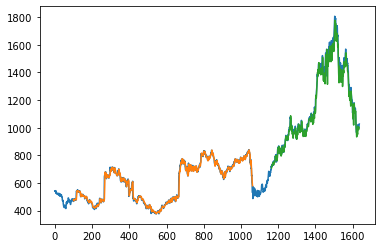

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
c=len(test_data)
print(c)
c=c-100
c

573


473

In [34]:
x_input=test_data[c:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.7090851867394041,
 0.7437054133445238,
 0.7467477968946705,
 0.7492306616309972,
 0.7425164358651559,
 0.7287033151489719,
 0.7247517135263672,
 0.7252762624143236,
 0.6691145614771297,
 0.7087704574066302,
 0.7229682473073158,
 0.7120226605119597,
 0.7346132326199468,
 0.7534620226605118,
 0.7328297664008951,
 0.7593020002797595,
 0.7892362568191356,
 0.7756679255839976,
 0.7766820534340466,
 0.788012309413904,
 0.7569590152468875,
 0.7788501888375996,
 0.7813680234997902,
 0.7717862638131205,
 0.812631137221989,
 0.8153937613652258,
 0.8338578822212896,
 0.8072807385648342,
 0.8030144076094559,
 0.8015456707231778,
 0.7833263393481604,
 0.7855294446775773,
 0.7768918729892291,
 0.7849699258637572,
 0.7782557000979158,
 0.7574835641348439,
 0.7639180304937752,
 0.7500699398517274,
 0.7503846691845013,
 0.7264652398936915,
 0.7232829766400894,
 0.6771926143516576,
 0.6468736886277802,
 0.6524688767659812,
 0.6549167715764443,
 0.6505805007693384,
 0.6253322142957058,
 0.628864176807

Demonstrate prediction for next few days

In [37]:
lst_output=[]
n_steps=100
i=0
b=20
while(i<b):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.45297763]
101
1 day input [0.74370541 0.7467478  0.74923066 0.74251644 0.72870332 0.72475171
 0.72527626 0.66911456 0.70877046 0.72296825 0.71202266 0.73461323
 0.75346202 0.73282977 0.759302   0.78923626 0.77566793 0.77668205
 0.78801231 0.75695902 0.77885019 0.78136802 0.77178626 0.81263114
 0.81539376 0.83385788 0.80728074 0.80301441 0.80154567 0.78332634
 0.78552944 0.77689187 0.78496993 0.7782557  0.75748356 0.76391803
 0.75006994 0.75038467 0.72646524 0.72328298 0.67719261 0.64687369
 0.65246888 0.65491677 0.6505805  0.62533221 0.62886418 0.61893272
 0.62596167 0.61735907 0.59791579 0.58504686 0.62040145 0.63956497
 0.61886278 0.60567912 0.59319485 0.58504686 0.57808784 0.56843614
 0.57483564 0.55654637 0.51199468 0.52776612 0.5361589  0.5050007
 0.47828368 0.49118758 0.52241572 0.55091621 0.56228144 0.53874668
 0.53832704 0.5396559  0.53706812 0.52734648 0.52308015 0.53315149
 0.51304378 0.47254861 0.45730172 0.4502378  0.41893971 0.41177088
 0.42177228 0.4362848  0.42222688 

9 day output [[0.39444885]]
10 day input [0.72296825 0.71202266 0.73461323 0.75346202 0.73282977 0.759302
 0.78923626 0.77566793 0.77668205 0.78801231 0.75695902 0.77885019
 0.78136802 0.77178626 0.81263114 0.81539376 0.83385788 0.80728074
 0.80301441 0.80154567 0.78332634 0.78552944 0.77689187 0.78496993
 0.7782557  0.75748356 0.76391803 0.75006994 0.75038467 0.72646524
 0.72328298 0.67719261 0.64687369 0.65246888 0.65491677 0.6505805
 0.62533221 0.62886418 0.61893272 0.62596167 0.61735907 0.59791579
 0.58504686 0.62040145 0.63956497 0.61886278 0.60567912 0.59319485
 0.58504686 0.57808784 0.56843614 0.57483564 0.55654637 0.51199468
 0.52776612 0.5361589  0.5050007  0.47828368 0.49118758 0.52241572
 0.55091621 0.56228144 0.53874668 0.53832704 0.5396559  0.53706812
 0.52734648 0.52308015 0.53315149 0.51304378 0.47254861 0.45730172
 0.4502378  0.41893971 0.41177088 0.42177228 0.4362848  0.42222688
 0.42999021 0.42306616 0.44125052 0.4506924  0.45097216 0.43621486
 0.44369842 0.43617989 0

18 day output [[0.28614208]]
19 day input [0.78801231 0.75695902 0.77885019 0.78136802 0.77178626 0.81263114
 0.81539376 0.83385788 0.80728074 0.80301441 0.80154567 0.78332634
 0.78552944 0.77689187 0.78496993 0.7782557  0.75748356 0.76391803
 0.75006994 0.75038467 0.72646524 0.72328298 0.67719261 0.64687369
 0.65246888 0.65491677 0.6505805  0.62533221 0.62886418 0.61893272
 0.62596167 0.61735907 0.59791579 0.58504686 0.62040145 0.63956497
 0.61886278 0.60567912 0.59319485 0.58504686 0.57808784 0.56843614
 0.57483564 0.55654637 0.51199468 0.52776612 0.5361589  0.5050007
 0.47828368 0.49118758 0.52241572 0.55091621 0.56228144 0.53874668
 0.53832704 0.5396559  0.53706812 0.52734648 0.52308015 0.53315149
 0.51304378 0.47254861 0.45730172 0.4502378  0.41893971 0.41177088
 0.42177228 0.4362848  0.42222688 0.42999021 0.42306616 0.44125052
 0.4506924  0.45097216 0.43621486 0.44369842 0.43617989 0.43845293
 0.4431389  0.45072737 0.45474892 0.45297763 0.45175129 0.44719538
 0.44123566 0.4345569

In [38]:
n_step=n_steps+1
z=n_step+b
day_new=np.arange(1,n_step)
day_pred=np.arange(n_step,z)

In [39]:
a=len(data1)
a=a-100
a

1537

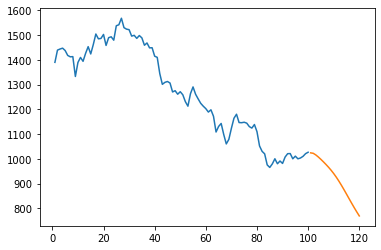

In [40]:
plt.plot(day_new,scaler.inverse_transform(data1[a:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

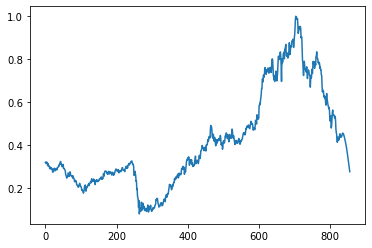

In [41]:
df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

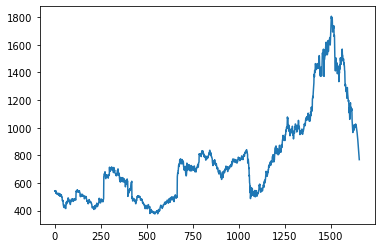

In [43]:
plt.plot(df3)

In [44]:
print("The model is created and the future value of the stock is predicted")

The model is created and the future value of the stock is predicted
